
# Week 1 — Weights & Bias Interactive Lab (Teacher Edition)

This notebook contains two live demos to help students *feel* how weights and bias affect a neuron's decision boundary.
It also includes **teacher notes**, timing guidance, and a short **student worksheet**.

**What you'll do today**
1. Run a simple 1-neuron demo with sliders for `w1`, `w2`, and `b`.
2. Show how **bias slides** the boundary and **weights rotate** it.
3. Toggle to an **activation heatmap** view to see σ(w·x+b).
4. (Optional) Turn on **Two Neurons** to demonstrate non-linear regions.
5. Let students answer the worksheet questions at the end.


In [1]:

# Setup: only numpy and matplotlib are required.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons



## Teacher Notes (Suggested Flow, ~25–35 min)
- **Hook (2 min):** “We can move a single line to separate two groups. Can you find the best line?”
- **Demo (10–15 min):**
  - Drag **w1 / w2** → the line **rotates** (slope changes).
  - Drag **b** → the line **slides** (intercept changes).
  - Toggle **Activation** view to show a smooth probability map.
- **Mini-challenge (5 min):** Accuracy starts at some value. Who can reach `≥ 95%`? Why not 100%?
- **Extension (10–15 min):** Check the **Two neurons** box:
  - Adjust second neuron sliders and output combiner.
  - Show how two neurons together can outline **curvy** regions.
- **Close (2 min):** Summarize: *weights = importance/rotation; bias = shift; multiple neurons = complex shapes*.



## Demo 1 — Single Neuron with Sliders (Boundary Only)

**Goal:** Build intuition for how a single neuron's weights and bias define a line:  
\begin{equation}
w_1 x_1 + w_2 x_2 + b = 0
\end{equation}


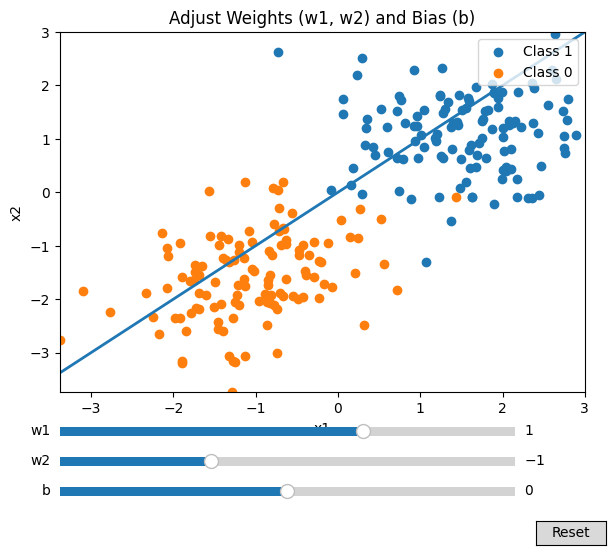

In [2]:

# Single-neuron interactive boundary (simple version)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# Data
np.random.seed(42)
n = 120
mean1 = np.array([1.5, 1.0])
mean2 = np.array([-1.0, -1.5])
cov = np.array([[0.6, 0.1],[0.1, 0.6]])

X1 = np.random.multivariate_normal(mean1, cov, n)
X2 = np.random.multivariate_normal(mean2, cov, n)
X = np.vstack([X1, X2])

xmin = min(X[:,0].min(), -3); xmax = max(X[:,0].max(), 3)
ymin = min(X[:,1].min(), -3); ymax = max(X[:,1].max(), 3)

# Initial params
w = np.array([1.0, -1.0])
b = 0.0

def decision_line(w, b, x_range):
    w1, w2 = w
    if abs(w2) < 1e-6:
        x = np.full(2, -b/w1 if abs(w1) > 1e-6 else 0.0)
        y_line = np.array([ymin, ymax])
        return x, y_line
    xs = np.linspace(x_range[0], x_range[1], 100)
    ys = -(w1/w2)*xs - b/w2
    return xs, ys

fig, ax = plt.subplots(figsize=(7,6))
plt.subplots_adjust(left=0.15, bottom=0.28)

ax.scatter(X1[:,0], X1[:,1], label="Class 1")
ax.scatter(X2[:,0], X2[:,1], label="Class 0")
ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)
ax.set_xlabel("x1"); ax.set_ylabel("x2")
ax.set_title("Adjust Weights (w1, w2) and Bias (b)")
ax.legend(loc="upper right")

line_x, line_y = decision_line(w, b, (xmin, xmax))
[line_plot] = ax.plot(line_x, line_y, linewidth=2, label="Decision boundary")

ax_w1 = plt.axes([0.15, 0.20, 0.65, 0.03])
ax_w2 = plt.axes([0.15, 0.15, 0.65, 0.03])
ax_b  = plt.axes([0.15, 0.10, 0.65, 0.03])

s_w1 = Slider(ax_w1, 'w1', -3.0, 3.0, valinit=w[0], valstep=0.1)
s_w2 = Slider(ax_w2, 'w2', -3.0, 3.0, valinit=w[1], valstep=0.1)
s_b  = Slider(ax_b,  'b',  -5.0, 5.0,  valinit=b,   valstep=0.1)

def update(val):
    w_new = np.array([s_w1.val, s_w2.val])
    b_new = s_b.val
    x_line, y_line = decision_line(w_new, b_new, (xmin, xmax))
    line_plot.set_xdata(x_line); line_plot.set_ydata(y_line)
    fig.canvas.draw_idle()

s_w1.on_changed(update); s_w2.on_changed(update); s_b.on_changed(update)

reset_ax = plt.axes([0.83, 0.025, 0.1, 0.04])
button = Button(reset_ax, 'Reset', hovercolor='0.975')
def reset(event):
    s_w1.reset(); s_w2.reset(); s_b.reset()
button.on_clicked(reset)

plt.show()



## Demo 2 — Accuracy, Activation Heatmap, and Two-Neuron Combo

- **Accuracy** updates live as you move the sliders.
- **View** toggle: "Boundary" vs "Activation" (σ(w·x+b)).
- **Two neurons** lets you adjust a second neuron and combine them to show **non-linear** regions.


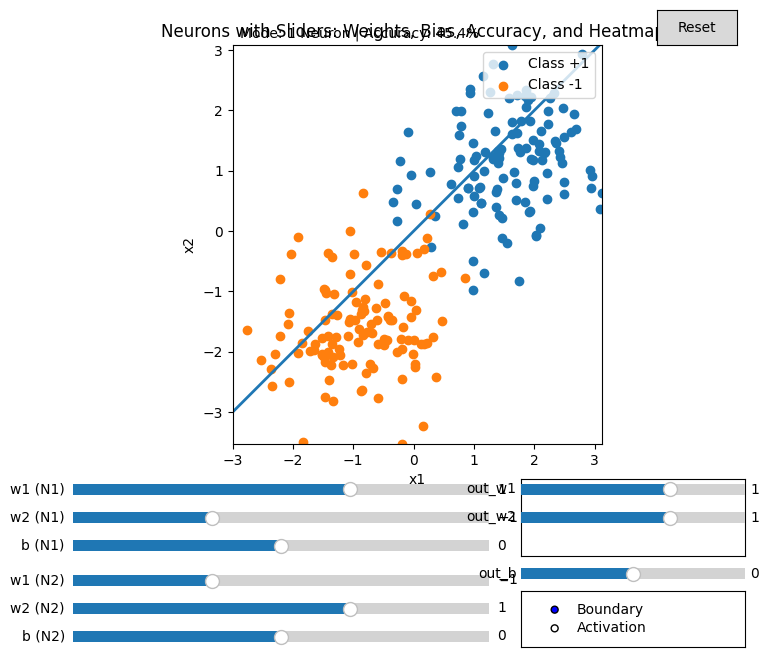

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons

# Data
np.random.seed(0)
n = 120
mean1 = np.array([1.6, 1.1])
mean2 = np.array([-1.0, -1.6])
cov = np.array([[0.6, 0.1],[0.1, 0.6]])

X1 = np.random.multivariate_normal(mean1, cov, n)
X2 = np.random.multivariate_normal(mean2, cov, n)
y1 = np.ones(n, dtype=int)
y2 = -np.ones(n, dtype=int)
X = np.vstack([X1, X2]); y = np.concatenate([y1, y2])

xmin = min(X[:,0].min(), -3); xmax = max(X[:,0].max(),  3)
ymin = min(X[:,1].min(), -3); ymax = max(X[:,1].max(),  3)

gx, gy = np.meshgrid(np.linspace(xmin, xmax, 200),
                     np.linspace(ymin, ymax, 200))
grid = np.stack([gx, gy], axis=-1).reshape(-1, 2)

def sigmoid(z): return 1/(1+np.exp(-z))

def decision_line(w, b, x_range):
    w1, w2 = w
    if abs(w2) < 1e-6:
        x = np.full(2, -b/w1 if abs(w1)>1e-6 else 0.0)
        y_line = np.array([ymin, ymax])
        return x, y_line
    xs = np.linspace(x_range[0], x_range[1], 200)
    ys = -(w1/w2)*xs - b/w2
    return xs, ys

def single_neuron_predict(X, w, b):
    z = X @ w + b
    return np.where(z>=0, 1, -1)

def two_neuron_predict(X, w1, b1, w2, b2, out_w1, out_w2, out_b):
    z1 = sigmoid(X @ w1 + b1)
    z2 = sigmoid(X @ w2 + b2)
    out = out_w1*z1 + out_w2*z2 + out_b
    return np.where(out>=0, 1, -1)

def accuracy(pred, y):
    return (pred==y).mean()

fig, ax = plt.subplots(figsize=(8,7))
plt.subplots_adjust(left=0.12, right=0.98, bottom=0.33, top=0.90)

ax.scatter(X1[:,0], X1[:,1], label="Class +1")
ax.scatter(X2[:,0], X2[:,1], label="Class -1")
ax.set_xlim(xmin, xmax); ax.set_ylim(ymin, ymax)
ax.set_xlabel("x1"); ax.set_ylabel("x2")
ax.set_title("Neurons with Sliders: Weights, Bias, Accuracy, and Heatmaps")
ax.legend(loc="upper right")

wA = np.array([1.0, -1.0]); bA = 0.0
wB = np.array([-1.0, 1.0]); bB = 0.0
out_w1, out_w2, out_b = 1.0, 1.0, 0.0

line_x, line_y = decision_line(wA, bA, (xmin, xmax))
[line_plot] = ax.plot(line_x, line_y, linewidth=2, label="Boundary")

heat = ax.imshow(np.zeros_like(gx), extent=[xmin, xmax, ymin, ymax],
                 origin='lower', alpha=0.4)
heat.set_visible(False)

acc_text = ax.text(0.02, 1.02, "", transform=ax.transAxes)

axcolor = 'lightgoldenrodyellow'
ax_w1 = plt.axes([0.12, 0.25, 0.52, 0.03], facecolor=axcolor)
ax_w2 = plt.axes([0.12, 0.21, 0.52, 0.03], facecolor=axcolor)
ax_bA = plt.axes([0.12, 0.17, 0.52, 0.03], facecolor=axcolor)
s_w1 = Slider(ax_w1, 'w1 (N1)', -3.0, 3.0, valinit=wA[0], valstep=0.1)
s_w2 = Slider(ax_w2, 'w2 (N1)', -3.0, 3.0, valinit=wA[1], valstep=0.1)
s_bA = Slider(ax_bA, 'b (N1)', -5.0, 5.0, valinit=bA, valstep=0.1)

ax_chk = plt.axes([0.68, 0.17, 0.28, 0.11])
chk = CheckButtons(ax_chk, ["Two neurons"], [False])

ax_w1B = plt.axes([0.12, 0.12, 0.52, 0.03], facecolor=axcolor)
ax_w2B = plt.axes([0.12, 0.08, 0.52, 0.03], facecolor=axcolor)
ax_bB  = plt.axes([0.12, 0.04, 0.52, 0.03], facecolor=axcolor)
s_w1B = Slider(ax_w1B, 'w1 (N2)', -3.0, 3.0, valinit=wB[0], valstep=0.1)
s_w2B = Slider(ax_w2B, 'w2 (N2)', -3.0, 3.0, valinit=wB[1], valstep=0.1)
s_bB  = Slider(ax_bB,  'b (N2)', -5.0, 5.0, valinit=bB, valstep=0.1)

ax_out1 = plt.axes([0.68, 0.25, 0.28, 0.03], facecolor=axcolor)
ax_out2 = plt.axes([0.68, 0.21, 0.28, 0.03], facecolor=axcolor)
ax_outb = plt.axes([0.68, 0.17-0.04, 0.28, 0.03], facecolor=axcolor)
s_out1 = Slider(ax_out1, 'out_w1', -3.0, 3.0, valinit=out_w1, valstep=0.1)
s_out2 = Slider(ax_out2, 'out_w2', -3.0, 3.0, valinit=out_w2, valstep=0.1)
s_outb = Slider(ax_outb, 'out_b',  -5.0, 5.0, valinit=out_b,  valstep=0.1)

ax_view = plt.axes([0.68, 0.04, 0.28, 0.08])
view = RadioButtons(ax_view, ('Boundary', 'Activation'), active=0)

reset_ax = plt.axes([0.85, 0.90, 0.10, 0.05])
button = Button(reset_ax, 'Reset', hovercolor='0.975')

def sigmoid(z): return 1/(1+np.exp(-z))

def single_neuron_predict(X, w, b):
    return np.where(X @ w + b >= 0, 1, -1)

def two_neuron_predict(X, w1, b1, w2, b2, out_w1, out_w2, out_b):
    z1 = sigmoid(X @ w1 + b1)
    z2 = sigmoid(X @ w2 + b2)
    out = out_w1*z1 + out_w2*z2 + out_b
    return np.where(out >= 0, 1, -1)

def accuracy(pred, y): return (pred == y).mean()

def update_display():
    wA_now = np.array([s_w1.val, s_w2.val]); bA_now = s_bA.val
    twoN = chk.get_status()[0]

    if not twoN:
        preds = single_neuron_predict(X, wA_now, bA_now)
        acc = accuracy(preds, y)
        acc_text.set_text(f"Mode: 1 Neuron | Accuracy: {acc*100:.1f}%")

        if view.value_selected == 'Boundary':
            heat.set_visible(False)
            line_x, line_y = decision_line(wA_now, bA_now, (xmin, xmax))
            line_plot.set_xdata(line_x); line_plot.set_ydata(line_y)
            line_plot.set_visible(True)
        else:
            z = 1/(1+np.exp(-(grid @ wA_now + bA_now)))
            heat.set_data(z.reshape(gx.shape))
            heat.set_visible(True)
            line_plot.set_visible(False)
    else:
        wB_now = np.array([s_w1B.val, s_w2B.val]); bB_now = s_bB.val
        out1_now, out2_now, outb_now = s_out1.val, s_out2.val, s_outb.val

        preds = two_neuron_predict(X, wA_now, bA_now, wB_now, bB_now, out1_now, out2_now, outb_now)
        acc = accuracy(preds, y)
        acc_text.set_text(f"Mode: 2 Neurons | Accuracy: {acc*100:.1f}%")

        z1 = 1/(1+np.exp(-(grid @ wA_now + bA_now)))
        z2 = 1/(1+np.exp(-(grid @ wB_now + bB_now)))
        out = out1_now*z1 + out2_now*z2 + outb_now
        heat.set_data(1/(1+np.exp(-out)).reshape(gx.shape))
        heat.set_visible(True); line_plot.set_visible(False)

    fig.canvas.draw_idle()

def on_slider_change(val): update_display()
def on_check_clicked(label): update_display()
def on_view_change(label): update_display()

def reset(event):
    s_w1.reset(); s_w2.reset(); s_bA.reset()
    s_w1B.reset(); s_w2B.reset(); s_bB.reset()
    s_out1.reset(); s_out2.reset(); s_outb.reset()
    # Reset radio/check
    if view.value_selected != 'Boundary':
        for i, lab in enumerate(view.labels):
            if lab.get_text() == 'Boundary':
                view.set_active(i)
                break
    if chk.get_status()[0]:
        chk.set_active(0)
    update_display()

for s in [s_w1, s_w2, s_bA, s_w1B, s_w2B, s_bB, s_out1, s_out2, s_outb]:
    s.on_changed(on_slider_change)
chk.on_clicked(on_check_clicked)
view.on_clicked(on_view_change)
button.on_clicked(reset)

update_display()
plt.show()



## Student Worksheet (Short Answer)

1. **What does the bias `b` do** to the decision boundary when you move it?  
   _Hint: try fixing `w1`,`w2` and sliding `b` only._

2. When you increase `w1` while keeping `w2` fixed, how does the **slope** of the boundary change?  
   Try a few values and describe the effect in plain words.

3. Toggle to **Activation** view. What does a brighter area mean?  
   How is this related to the neuron's output before/after the sigmoid?

4. Turn on **Two neurons**. Adjust the second neuron's sliders and the output combiner.  
   Describe a boundary you can create that **isn't** just a straight line. (Sketch it if helpful.)

5. With a bit of label noise (or overlapping clusters), is it always possible to reach **100% accuracy**?  
   Why or why not? What would a larger network help with?
